<a href="https://colab.research.google.com/github/Harshnagwani123/ML_TRAINING/blob/main/ML_DAY3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt # Changed import here
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
iris=load_iris()
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target)

In [4]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [7]:
param_grid ={
    'max_depth':[None,2,3,4,5],
    'min_samples_split':[2,3,4],
    'criterion':['gini','entropy']
}

dt=DecisionTreeClassifier(random_state=42)
grid=GridSearchCV(dt,param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [9]:
print("Best Parameter",grid.best_params_)


Best Parameter {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [10]:
best_dt=grid.best_estimator_
y_pred=best_dt.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


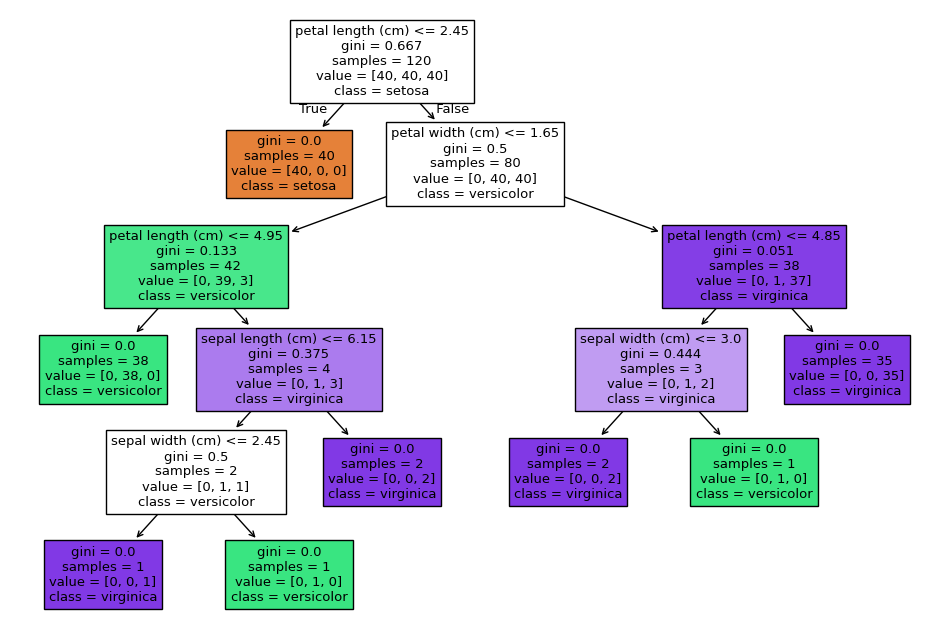

In [17]:
plt.figure(figsize=(12,8))
plot_tree(best_dt,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

RANDOM FOREST

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
iris=load_iris()
X=iris.data
y=iris.target

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [21]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred=rf.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


DECISION TREE V/S RANDOM FOREST WITH VIRTUALIZATION

=== Decision Tree ===
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



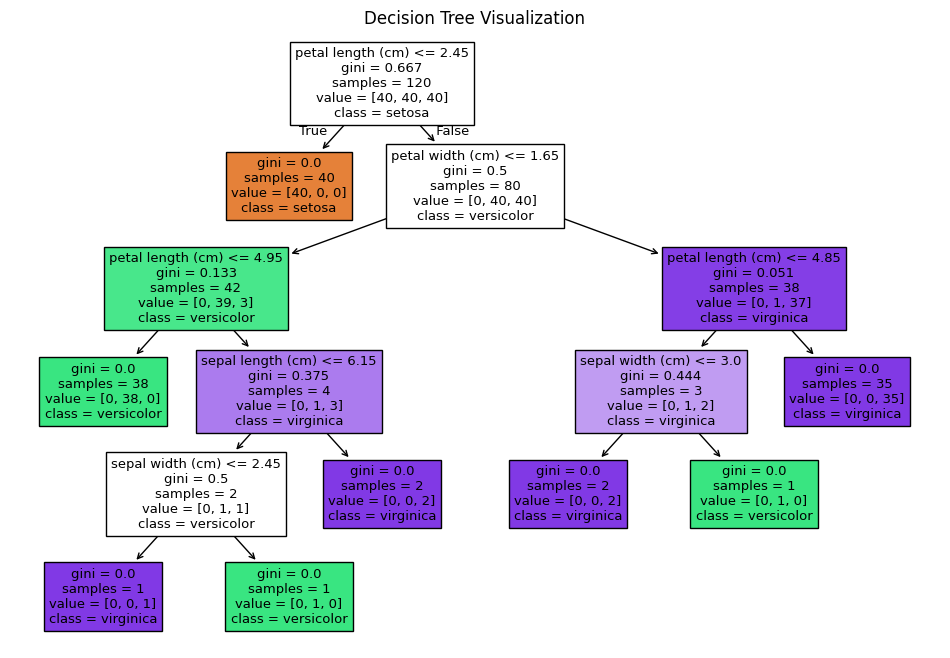


=== Random Forest ===
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



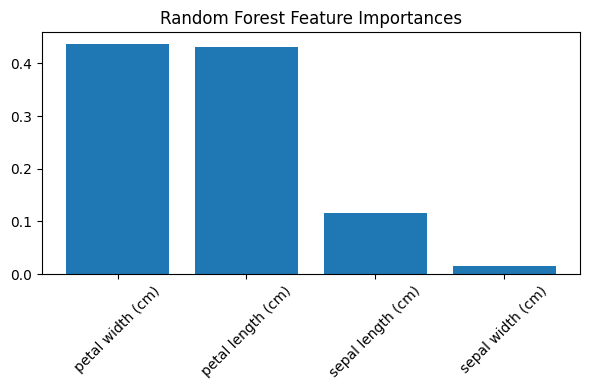

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Decision Tree -----
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ----- Random Forest -----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature importance plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
